In [ ]:
# Conexion a Google Colaborative a drive!
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


### **1. Carga de Modulos**



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **2. Lectura Inicial del dataset**

In [ ]:
data = pd.read_csv("/gdrive/My Drive/Trabajo-URP/BankMarketing.csv",sep=";")

In [ ]:
data.shape

(41188, 21)

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df_pivot = pd.DataFrame({'types': data.dtypes,
                         'nulls': data.isna().sum(),
                          '% nulls': data.isna().sum() / data.shape[0],
                          'size': data.shape[0],
                          'uniques': data.nunique()})
df_pivot
#No hay datos nulos

,types,nulls,% nulls,size,uniques
age,int64,0,0.0,41188,78
job,object,0,0.0,41188,12
marital,object,0,0.0,41188,4
education,object,0,0.0,41188,8
default,object,0,0.0,41188,3
housing,object,0,0.0,41188,3
loan,object,0,0.0,41188,3
contact,object,0,0.0,41188,2
month,object,0,0.0,41188,10
day_of_week,object,0,0.0,41188,5


In [ ]:
data.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


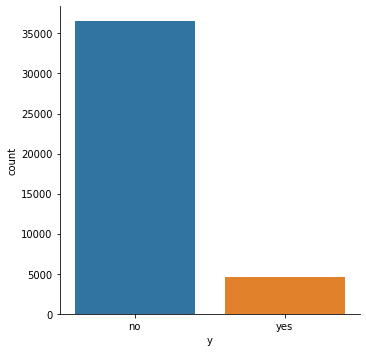

In [ ]:
sns.factorplot('y',data=data,kind="count")

Falta balanceo del dataset

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
columnsNumeric = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
columnsString = ['job', 'marital', 'education','default','housing','loan','contact','month','day_of_week','poutcome']     

In [ ]:
# Descripcion o estadisticas basicas de un set de datos
data[columnsNumeric].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


No hay valores missing, existen valores atipicos

In [ ]:
data[columnsNumeric].head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


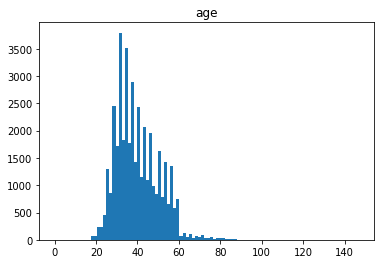

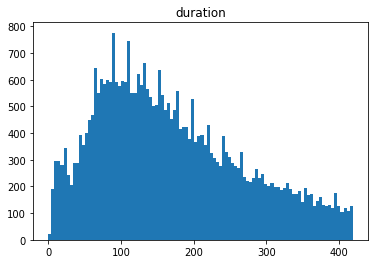

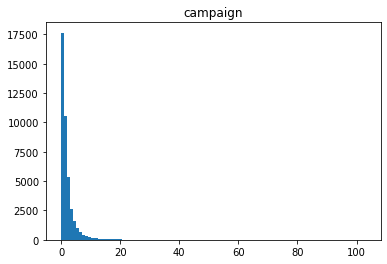

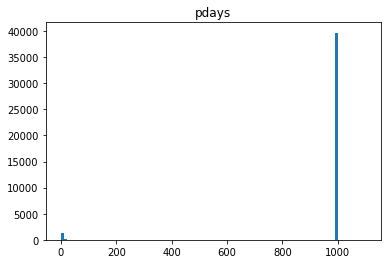

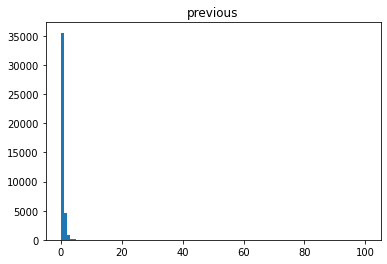

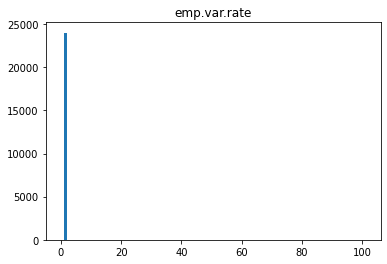

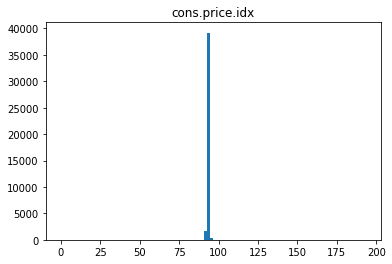

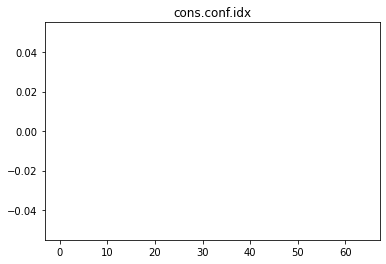

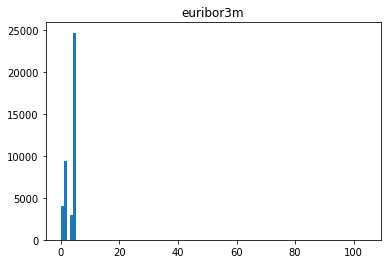

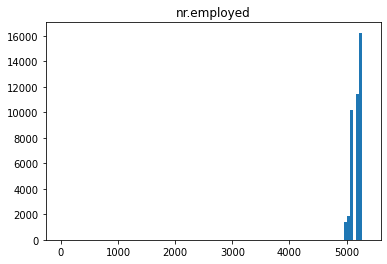

In [ ]:
# Es muy importante analizar las variables cuantitativas :
for x in columnsNumeric:
  Q03 = int(data[x].quantile(0.75))+100
  plt.title(data[x].name)
  plt.hist(data[x], bins= 100,range=(0,Q03))
  plt.show()

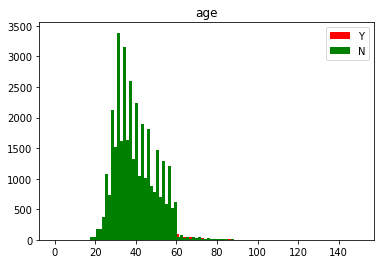

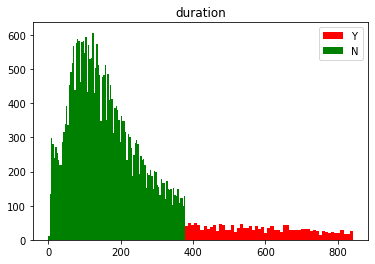

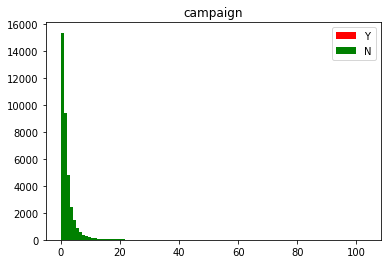

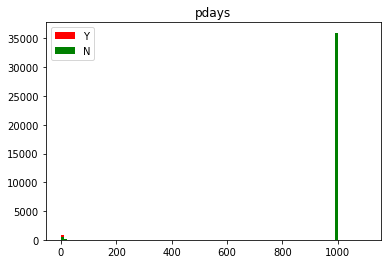

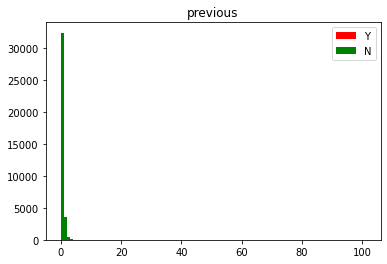

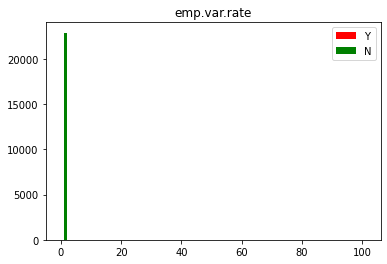

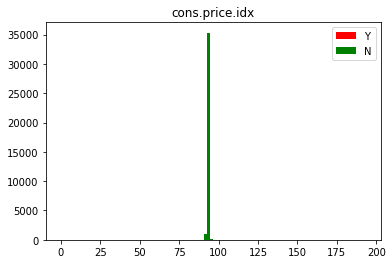

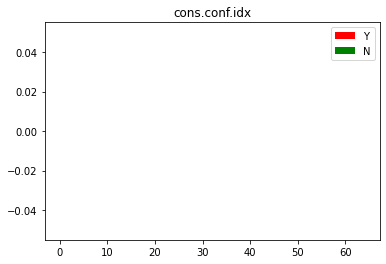

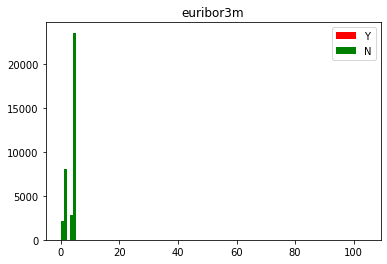

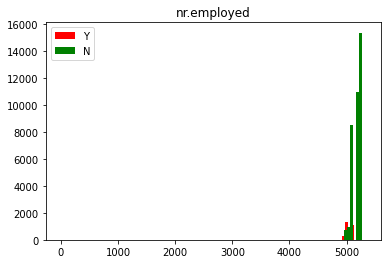

In [ ]:
# Es muy importante analizar las variables cuantitativas, sobre todo respecto al objetivo:
for x in columnsNumeric:
  # Generamos los subsets de comparación
  x1 = data.loc[data.y =='yes', x]
  x2 = data.loc[data.y =='no', x]
  Q03x1 = int(pd.DataFrame(x1)[x].quantile(0.75))+100
  Q03x2 = int(pd.DataFrame(x2)[x].quantile(0.75))+100

  # Mostramos las densidades
  plt.title(data[x].name)
  plt.hist(x1, bins= 100, color='r', range=(0,Q03x1), label='Y')
  plt.hist(x2, bins= 100, color='g', range=(0,Q03x2), label='N')
  plt.legend()
  plt.show()

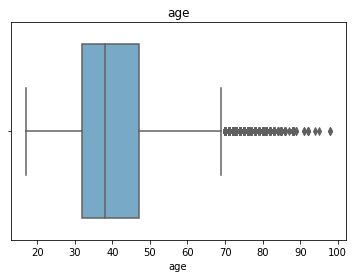

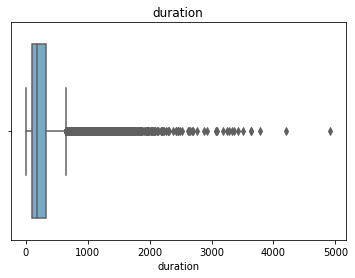

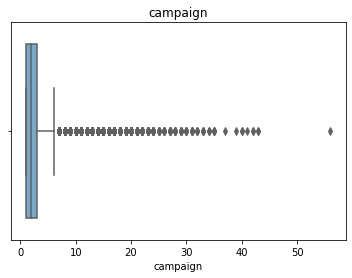

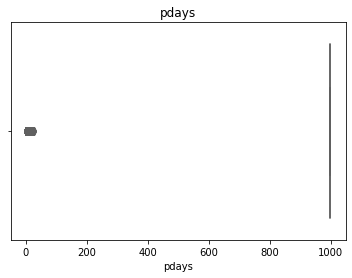

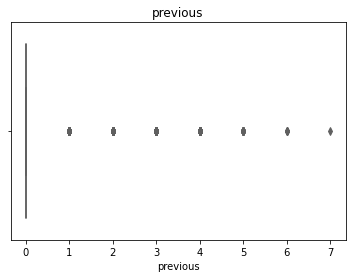

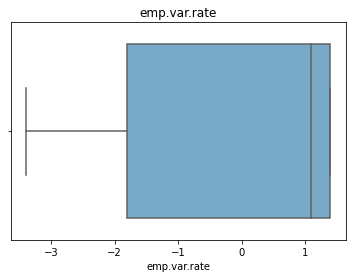

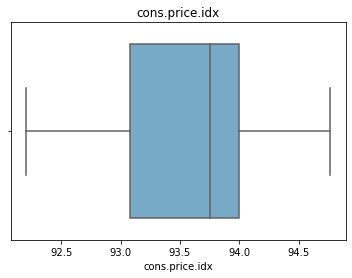

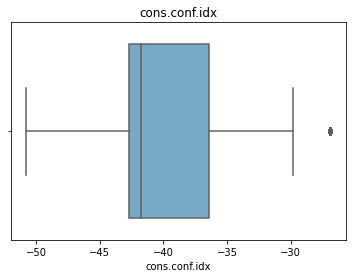

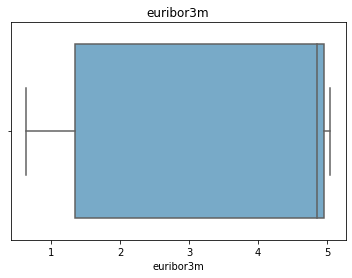

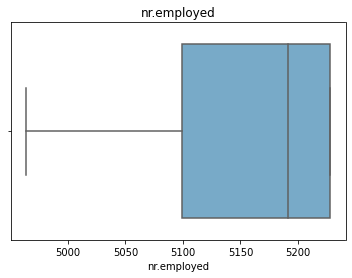

In [ ]:
# El grafico de cajas es muy importante pues nos muestra , dispersion, forma y atipicos:
for x in columnsNumeric:
  plt.title(data[x].name)
  sns.boxplot(x=data[x], palette="Blues");
  plt.show()

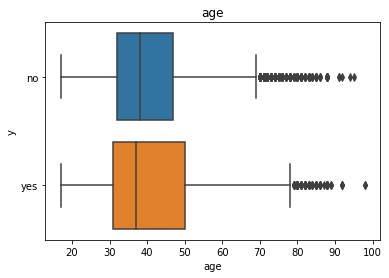

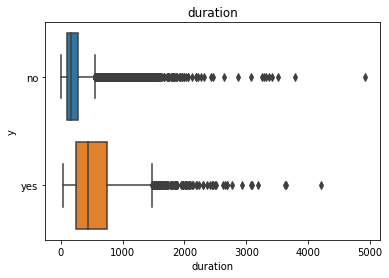

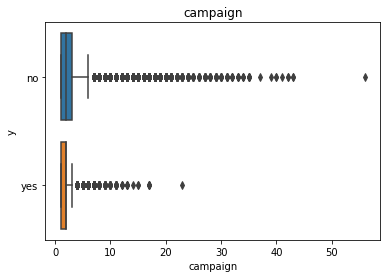

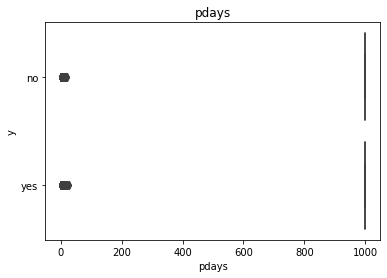

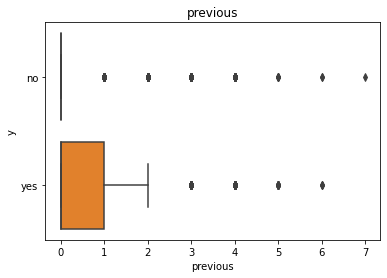

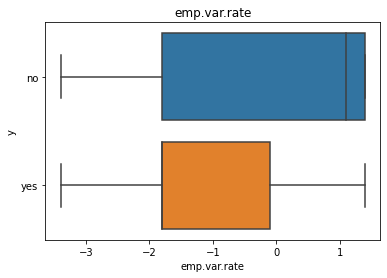

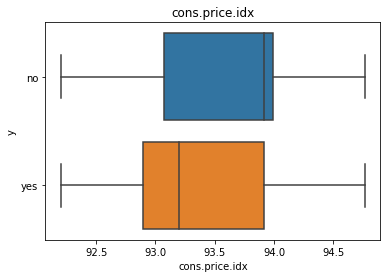

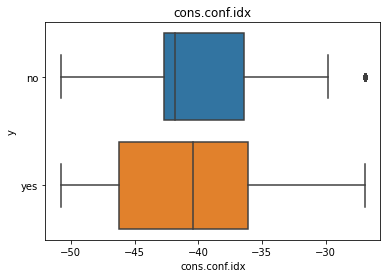

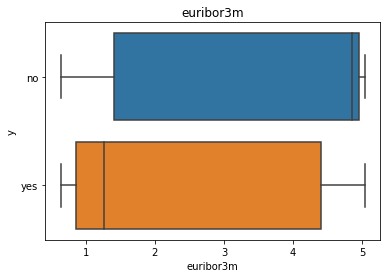

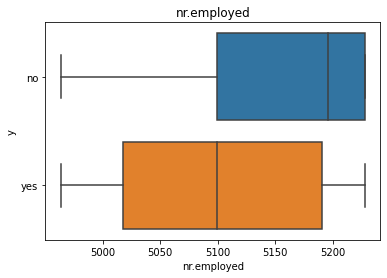

In [ ]:
# El grafico de cajas es muy importante pues nos muestra , dispersion, forma y atipicos; siempre respecto al target:
for x in columnsNumeric:
  plt.title(data[x].name)
  sns.boxplot(x=data[x], y = data.y);
  plt.show()

In [ ]:
# Personas que se han suscrito en mediana tienen menos numero de empleados
# Personas que se han suscrito en mediana tienen menos ratio de cambio en los ultimos 3 meses
# Personas que se han suscrito en mediana tienen mas indice de confianza
# Personas que se han suscrito en mediana tienen menos indice de precios

columnas numericas tienen valores atipicos(outliers),variables asimetricas

In [ ]:
data[columnsString].describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


In [ ]:
data[columnsString].dtypes

job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
poutcome       object
dtype: object

In [ ]:
# Mostramos la frecuencia de variables cateóricas para encontras hallazgos
for x in columnsString:
    print(x)
    print(data.groupby(x).size())
    print("\n")

job
job
admin.           10422
blue-collar       9254
entrepreneur      1456
housemaid         1060
management        2924
retired           1720
self-employed     1421
services          3969
student            875
technician        6743
unemployed        1014
unknown            330
dtype: int64


marital
marital
divorced     4612
married     24928
single      11568
unknown        80
dtype: int64


education
education
basic.4y                4176
basic.6y                2292
basic.9y                6045
high.school             9515
illiterate                18
professional.course     5243
university.degree      12168
unknown                 1731
dtype: int64


default
default
no         32588
unknown     8597
yes            3
dtype: int64


housing
housing
no         18622
unknown      990
yes        21576
dtype: int64


loan
loan
no         33950
unknown      990
yes         6248
dtype: int64


contact
contact
cellular     26144
telephone    15044
dtype: int64


month
month
apr     26

In [ ]:
columnsString

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

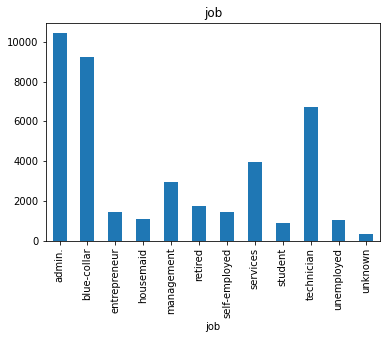

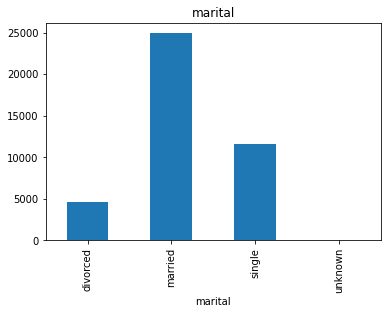

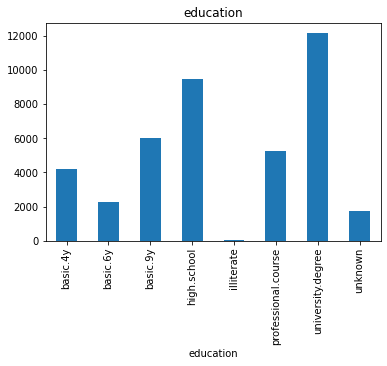

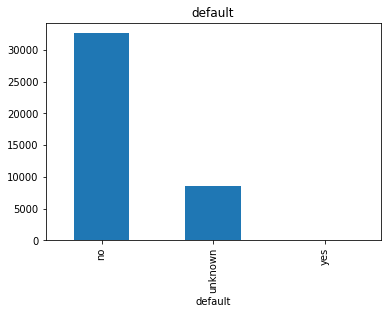

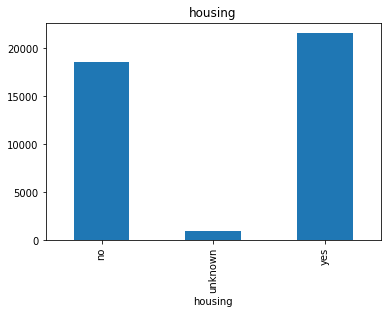

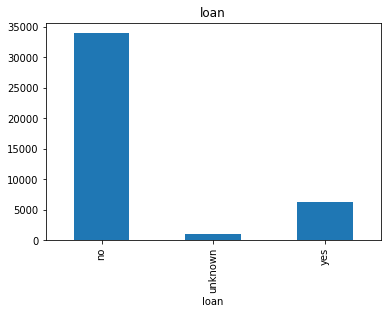

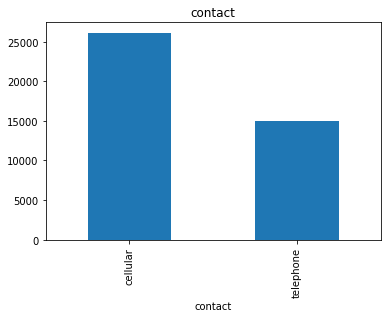

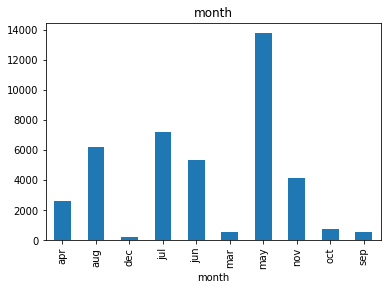

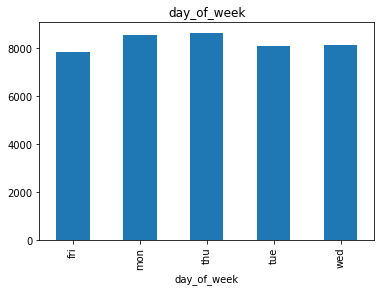

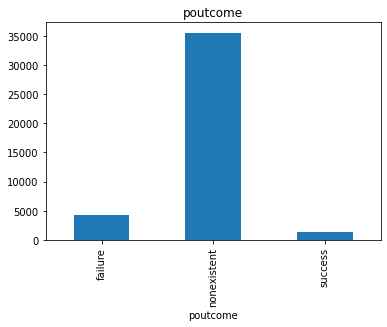

In [ ]:
#Columnas categoricas
for x in columnsString:
  plt.title(x)
  data.fillna("--NULL").groupby(x)[x].count().plot(kind = "bar")
  plt.show()

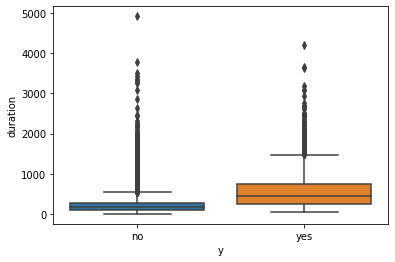

In [ ]:
sns.boxplot(x='y', y='duration', data=data)

(array([3.790e+02, 2.836e+03, 9.794e+03, 8.166e+03, 6.068e+03, 5.890e+03,
        3.825e+03, 3.320e+03, 2.910e+02, 1.970e+02, 2.110e+02, 1.120e+02,
        6.500e+01, 3.000e+01, 4.000e+00]),
 array([17. , 22.4, 27.8, 33.2, 38.6, 44. , 49.4, 54.8, 60.2, 65.6, 71. ,
        76.4, 81.8, 87.2, 92.6, 98. ]),
 <a list of 15 Patch objects>)

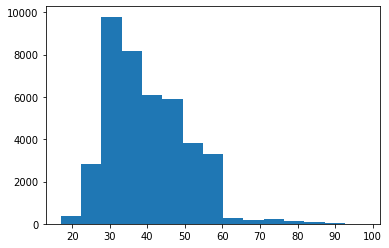

In [ ]:
plt.hist(x='age', data=data, bins = 15)

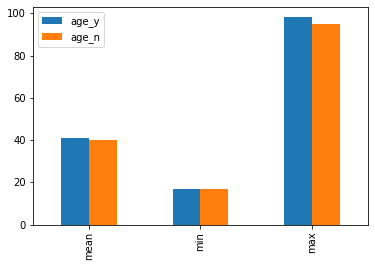

In [ ]:
df_age = pd.DataFrame()
df_age['age_y'] = (data[data['y'] == 'yes'][['y','age']].describe())['age']
df_age['age_n'] = (data[data['y'] == 'no'][['y','age']].describe())['age']

df_age.drop(['count','std', '25%', '50%', '75%']).plot.bar()

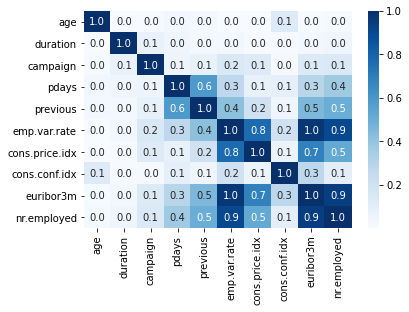

In [ ]:
sns.heatmap(abs(data[columnsNumeric].corr()), annot=True, fmt='.1f', cmap='Blues')
plt.show()

Existen correlaciones entre variables

In [ ]:
data[columnsString].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [ ]:
data_categoricas_01 = data[columnsString]
data_categoricas_02 = data[columnsString]

In [ ]:
# Tratamiento de Variables Categoricas
# LabelEncoder
from sklearn.preprocessing import LabelEncoder # 1° Importo la funcion!

for c in data_categoricas_01:
    print(str(c))
    le = LabelEncoder()                        # 2° Defino o instancio la funcion!
    le.fit(data_categoricas_01[str(c)])          # 3° Ajuste o entrenamiento!
    data_categoricas_01[str(c)]=le.transform(data_categoricas_01[str(c)])   # 4° Aplicamos!

job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
data_categoricas_01.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3,1,0,0,0,0,1,6,1,1
1,7,1,3,1,0,0,1,6,1,1
2,7,1,3,0,2,0,1,6,1,1
3,0,1,1,0,0,0,1,6,1,1
4,7,1,3,0,0,2,1,6,1,1


In [ ]:
le.fit(data['y'])     
data['y']=le.transform(data['y']) 

In [ ]:
# Tratamiento de Variables Categoricas
# Preprocesamiento con OneHotEncoder
data_categoricas_03 = pd.get_dummies(data_categoricas_02)
data_categoricas_03.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
data2 = pd.concat([data[columnsNumeric],data_categoricas_01,data.y],axis=1)
data2.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,3,1,0,0,0,0,1,6,1,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,1,0,0,1,6,1,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,0,2,0,1,6,1,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,1,0,0,0,1,6,1,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,0,0,2,1,6,1,1,0


In [ ]:
data2.dtypes

age                 int64
duration            int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
poutcome            int64
y                   int64
dtype: object

In [ ]:
data2.shape

(41188, 21)

### Ingenieria de variables o feature enginnering

### Seleccion de variables

In [ ]:
! pip install woe

In [ ]:
# Anexos : WOE
import woe
from woe.eval import plot_ks
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string
import os
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
import warnings
warnings.filterwarnings('ignore')
max_bin = 20
force_bin = 3


# Creamos las Woes - IV
max_bin = 20
force_bin = 3

def mono_bin(Y, X, n = max_bin):
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)


def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)


def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [ ]:
import numpy as np
import pandas as pd
import graphviz, IPython
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib.ticker import FuncFormatter
from sklearn.tree import export_graphviz

def draw_tree(tree, df):
    s = export_graphviz(tree, out_file=None, feature_names=df.columns, filled=True)
    return graphviz.Source(s)

def set_rf_samples(n):
    """ Changes Scikit learn's random forests to give each tree a random sample of
    n random rows.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n))

def reset_rf_samples():
    """ Undoes the changes produced by set_rf_samples.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n_samples))

# Based on https://github.com/chrispaulca/waterfall.git
def waterfallplot(sample, data, Title="", x_lab="", y_lab="",
		 formatting="{:,.1f}", green_color='#29EA38', red_color='#FB3C62', blue_color='#24CAFF',
		 sorted_value=False, threshold=None, other_label='other', net_label='net', 
		 rotation_value=0, size=None):
	'''
	Given two sequences ordered appropriately, generate a standard waterfall chart.
	Optionally modify the title, axis labels, number formatting, bar colors, 
	increment sorting, and thresholding. Thresholding groups lower magnitude changes
	into a combined group to display as a single entity on the chart.
	'''
	
	#convert data and index to np.array
	index = np.array([f'{c}\n({sample[c].iloc[0]})' for c in sample])
	data = np.array(data)
	
	# wip
	#sorted by absolute value 
	if sorted_value: 
		abs_data = abs(data)
		data_order = np.argsort(abs_data)[::-1]
		data = data[data_order]
		index = index[data_order]
	
	#group contributors less than the threshold into 'other' 
	if threshold:
		
		abs_data = abs(data)
		threshold_v = abs_data.max()*threshold
		
		if threshold_v > abs_data.min():
			index = np.append(index[abs_data>=threshold_v],other_label)
			data = np.append(data[abs_data>=threshold_v],sum(data[abs_data<threshold_v]))
	
	changes = {'amount' : data}
	
	#define format formatter
	def money(x, pos):
		'The two args are the value and tick position'
		return formatting.format(x)
	formatter = FuncFormatter(money)
	
	fig, ax = plt.subplots(figsize=size)
	ax.yaxis.set_major_formatter(formatter)

	#Store data and create a blank series to use for the waterfall
	trans = pd.DataFrame(data=changes,index=index)
	blank = trans.amount.cumsum().shift(1).fillna(0)
	
	trans['positive'] = trans['amount'] > 0

	#Get the net total number for the final element in the waterfall
	total = trans.sum().amount
	trans.loc[net_label]= total
	blank.loc[net_label] = total

	#The steps graphically show the levels as well as used for label placement
	step = blank.reset_index(drop=True).repeat(3).shift(-1)
	step[1::3] = np.nan

	#When plotting the last element, we want to show the full bar,
	#Set the blank to 0
	blank.loc[net_label] = 0
	
	#define bar colors for net bar
	trans.loc[trans['positive'] > 1, 'positive'] = 99
	trans.loc[trans['positive'] < 0, 'positive'] = 99
	trans.loc[(trans['positive'] > 0) & (trans['positive'] < 1), 'positive'] = 99
	
	trans['color'] = trans['positive']
	
	trans.loc[trans['positive'] == 1, 'color'] = green_color
	trans.loc[trans['positive'] == 0, 'color'] = red_color
	trans.loc[trans['positive'] == 99, 'color'] = blue_color
	
	my_colors = list(trans.color)
	
	#Plot and label
	my_plot = plt.bar(range(0,len(trans.index)), blank, width=0.5, color='white')
	plt.bar(range(0,len(trans.index)), trans.amount, width=0.6,
			 bottom=blank, color=my_colors)       
								   
	
	# connecting lines - figure out later
	#my_plot = lines.Line2D(step.index, step.values, color = "gray")
	#my_plot = lines.Line2D((3,3), (4,4))
	
	#axis labels
	plt.xlabel("\n" + x_lab)
	plt.ylabel(y_lab + "\n")

	#Get the y-axis position for the labels
	y_height = trans.amount.cumsum().shift(1).fillna(0)
	
	temp = list(trans.amount)
	
	# create dynamic chart range
	for i in range(len(temp)):
		if (i > 0) & (i < (len(temp) - 1)):
			temp[i] = temp[i] + temp[i-1]
	
	trans['temp'] = temp
			
	plot_max = trans['temp'].max()
	plot_min = trans['temp'].min()
	
	#Make sure the plot doesn't accidentally focus only on the changes in the data
	if all(i >= 0 for i in temp):
		plot_min = 0
	if all(i < 0 for i in temp):
		plot_max = 0
	
	if abs(plot_max) >= abs(plot_min):
		maxmax = abs(plot_max)   
	else:
		maxmax = abs(plot_min)
		
	pos_offset = maxmax / 40
	
	plot_offset = maxmax / 15 ## needs to me cumulative sum dynamic

	#Start label loop
	loop = 0
	for index, row in trans.iterrows():
		# For the last item in the list, we don't want to double count
		if row['amount'] == total:
			y = y_height[loop]
		else:
			y = y_height[loop] + row['amount']
		# Determine if we want a neg or pos offset
		if row['amount'] > 0:
			y += (pos_offset*2)
			plt.annotate(formatting.format(row['amount']),(loop,y),ha="center", color = 'g', fontsize=9)
		else:
			y -= (pos_offset*4)
			plt.annotate(formatting.format(row['amount']),(loop,y),ha="center", color = 'r', fontsize=9)
		loop+=1

	#Scale up the y axis so there is room for the labels
	plt.ylim(plot_min-round(3.6*plot_offset, 7),plot_max+round(3.6*plot_offset, 7))
	
	#Rotate the labels
	plt.xticks(range(0,len(trans)), trans.index, rotation=rotation_value)
	
	#add zero line and title
	plt.axhline(0, color='black', linewidth = 0.6, linestyle="dashed")
	plt.title(Title)
	plt.tight_layout()

	return plt